## Objective
* To predict whether a liability customer will buy personal loans.
* Which variables are most significant.
* Which segment of customers should be targeted more.

# Data Description
* ID: Customer ID
* Age: Customer’s age in completed years
* Experience: #years of professional experience
* Income: Annual income of the customer (in thousand dollars)
* ZIP Code: Home Address ZIP code.
* Family: the Family size of the customer
* CCAvg: Average spending on credit cards per month (in thousand dollars)
* Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* Mortgage: Value of house mortgage if any. (in thousand dollars)
* Personal_Loan: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* Securities_Account: Does the customer have securities account with the bank? (0: No, 1: Yes)
* CD_Account: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* Online: Do customers use internet banking facilities? (0: No, 1: Yes)
* CreditCard: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

# Importing Libraries and dataset

In [29]:
# necessary data manipulation and plotting libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline


# train_test_split and model tuninig
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV


# Classification models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


# Evaluation metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)


# warnings and display options
import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)
pd.set_option("display.max_columns", None)


# For pandas profiling
from pandas_profiling import ProfileReport

<IPython.core.display.Javascript object>

In [5]:
df = pd.read_csv("Loan_Modelling.csv")

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


<IPython.core.display.Javascript object>

In [9]:
df.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,Online,CreditCard,Personal_Loan
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,0


<IPython.core.display.Javascript object>

# EDA

## 1. EDA on unprocessed data

In [16]:
print(df.shape)
df.info()

(5000, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Securities_Account  5000 non-null   int64  
 10  CD_Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
 13  Personal_Loan       5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


<IPython.core.display.Javascript object>

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Securities_Account,5000.0,0.104400,0.305809,0.0,0.00,0.0,0.00,1.0


<IPython.core.display.Javascript object>

* `ID`: The ID attribute does not add any information to our analysis as all the values are unique. There is no association between a person's customer ID and loan, also it does not provide any general conclusion for future potential loan customers. We can neglect this information for our model prediction.
* `Age`: Average age of customers is 45 years, age of customers has a wide range from 23 to 67 years. 
* `Experience`: A negative experience of -3 seems to be a data entry error. The average working experience of the customers is ~20 years, we have some highly experienced working professions in the data.
* `Income`: Average income of customers is 73k dollars. Income has a wide range from 8k dollars to 224k dollars, there's also a very huge difference in 75th percentile and maximum value which indicates there might be outliers present in the data. 
* `ZIPCode`: ZIPCode seems to have many unique values, we will see if some insights can be extracted from it.
* `Family`:  75% of the customers have 3 or less than 3 dependents.
* `CCAvg`: Some customers have average spending of 0 dollars a month. There's a huge difference in the 75th percentile and maximum value of the average spendings indicating that there might be outliers present.
* `Mortgage`: Average mortgage value of house of customers is ~56k dollars. Many customers do not have any mortgages.

In [19]:
# some experience columns have a negative value - checking that
df[df["Experience"] < 0]["Experience"].unique()

array([-1, -2, -3])

<IPython.core.display.Javascript object>

In [21]:
# replacing the nagative columns with positive
df["Experience"].replace(-1, 1, inplace=True)
df["Experience"].replace(-2, 2, inplace=True)
df["Experience"].replace(-3, 3, inplace=True)

<IPython.core.display.Javascript object>

## 2. Univariate Analysis
- For checking the skewness and distribution of data
- The below section code can also be alternated with .skew(), .std() and .mean() functions

In [54]:
# a function to plot histgram and boxplot for the features
def histogram_boxplot(data, feature, figsize=(8, 6), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """

    # creating the 2 subplots
    f2, (ax_box, ax_hist) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )

    # creating boxplot
    sns.boxplot(
        data=data, x=feature, ax=ax_box, showmeans=True, color="yellow"
    )  # boxplot will be created and a star will indicate the mean value of the column

    # creating histogram
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist, bins=bins, palette="winter"
    ) if bins else sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist)

    ax_hist.axvline(
        data[feature].mean(), color="red", linestyle="--"
    )  # Add mean to the histogram
    ax_hist.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

In [56]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online',
       'CreditCard', 'Personal_Loan'],
      dtype='object')

<IPython.core.display.Javascript object>

#### For numerical variables

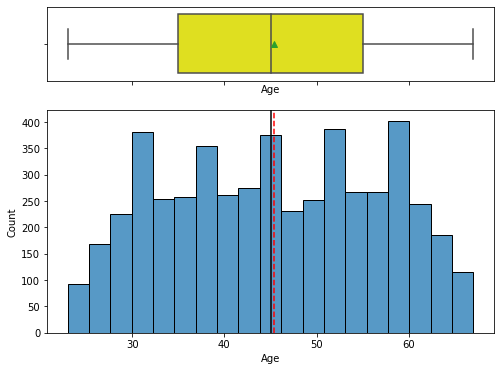

<IPython.core.display.Javascript object>

In [55]:
histogram_boxplot(df, "Age")

* The Experience variable seems to be fairly symmetrical about mean and median.
* The distribution of Experience looks like the distribution of Age, it would be interesting to see if there's a correlation between them.
* The mean and median experience of customers is equal to ~20 years.
* Some customers have experience of more than 40 years.

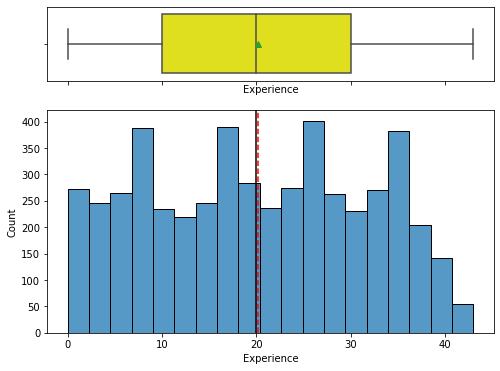

<IPython.core.display.Javascript object>

In [57]:
histogram_boxplot(df, "Experience")

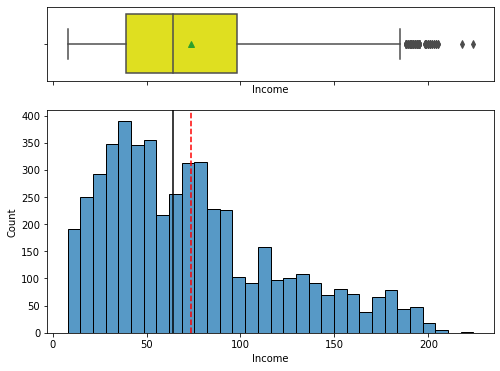

<IPython.core.display.Javascript object>

In [58]:
histogram_boxplot(df, "Income")

- Income is right skewed
- Some customers have an Income above 200k dollars.
- 50% of the customers have income less than 60k dollars.

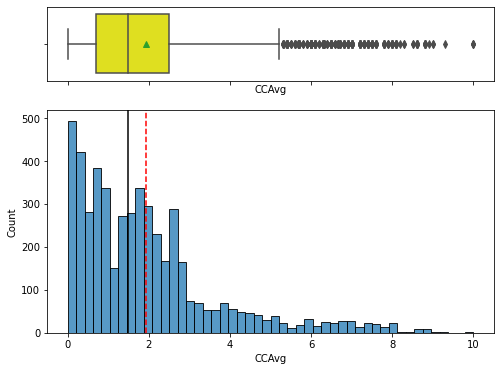

<IPython.core.display.Javascript object>

In [59]:
histogram_boxplot(df, "CCAvg")

* The distribution of CCAvg is skewed to the right and there are many outliers.
* 50% of the customers have CCAvg less than 1.5.
* We should check if the customers who spend more monthly are inclined toward taking a loan or not.

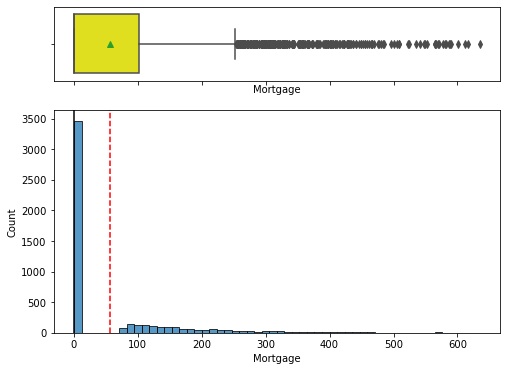

<IPython.core.display.Javascript object>

In [60]:
histogram_boxplot(df, "Mortgage")

* Most customers have not mortgaged their house but there are many outliers.
* Some customers have a mortgage house value of more than 600k dollars.
* Such customers can be potential customers who require a personal loan.

In [62]:
# function to create labeled barplots

# data: dataframe
# feature: dataframe column
# perc: whether to display percentages instead of count (default is False)
# n: displays the top n category levels (default is None, i.e., display all levels)

def labeled_barplot(data, feature, perc=False, n=None):

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

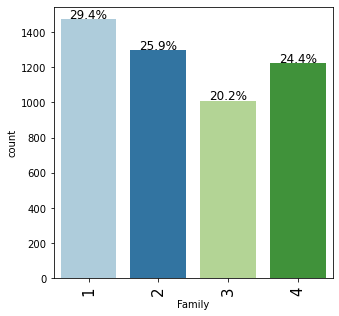

<IPython.core.display.Javascript object>

In [63]:
labeled_barplot(df, "Family", perc=True)

* Most of the customers are single/live alone (~30%).
* Second most are the ones with one dependent on them (25.9%).
* We can check for loans on customers that havemore dependants

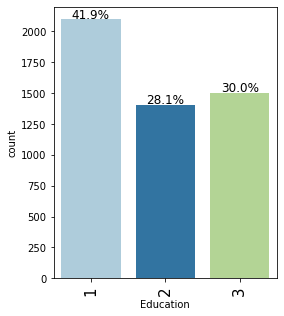

<IPython.core.display.Javascript object>

In [64]:
labeled_barplot(df, "Education", perc=True)

* Most of the customers are undergraduate (41.9%), followed by customers who have advanced/professional education (30%).
* Professional education customers are more likely to take a loan

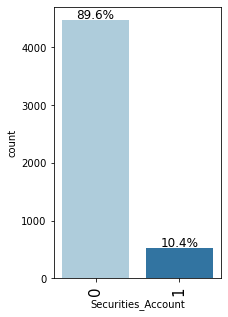

<IPython.core.display.Javascript object>

In [66]:
labeled_barplot(df, "Securities_Account", perc=True)

* 89% of the customers do not have a securities account.
* less likely to take a loan

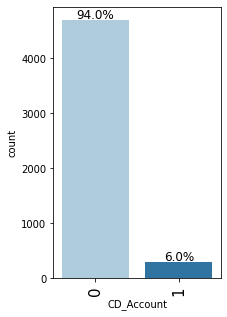

<IPython.core.display.Javascript object>

In [28]:
labeled_barplot(data, "CD_Account", perc=True)

* 94% of the customers do not have a certificate of deposit (CD_Account) with the bank.
* Less likely to take a loan

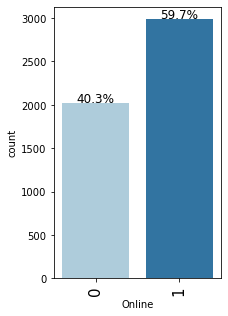

<IPython.core.display.Javascript object>

In [67]:
labeled_barplot(df, "Online", perc=True)

* Approximately 60% of the customers use internet banking facilities.
* This provides no information on customer taking loan

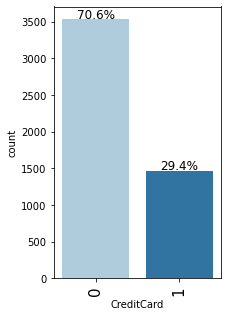

<IPython.core.display.Javascript object>

In [68]:
labeled_barplot(df, "CreditCard", perc=True)

* Approximately 70% of customers do not have a credit card issued by any other bank.

In [69]:
# checking the number of uniques in the zip code
df["ZIPCode"].nunique()

467

<IPython.core.display.Javascript object>

* There are 467 unique values in the zip code.
* In the US, The first digit of a PIN indicates the zone or a region, the second indicates the sub-zone, and the third, combined with the first two, indicates the sorting district within that zone. The final three digits are assigned to individual post offices within the sorting district
* Let's try to group them based on the first 2 digits to reduce the number of unique values in the ZIPCode column.

In [70]:
df["ZIPCode"] = df["ZIPCode"].astype(str)
print(
    "Number of unique values if we take first two digits of ZIPCode: ",
    df["ZIPCode"].str[0:2].nunique(),
)
df["ZIPCode"] = df["ZIPCode"].str[0:2]

Number of unique values if we take first two digits of ZIPCode:  7


<IPython.core.display.Javascript object>

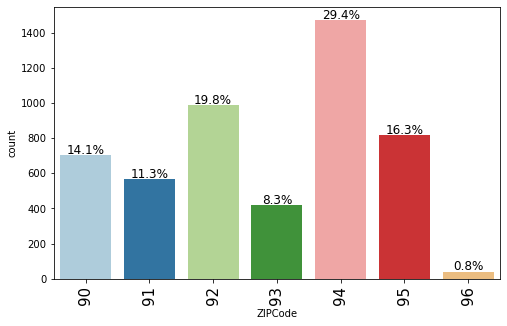

<IPython.core.display.Javascript object>

In [71]:
labeled_barplot(df, "ZIPCode", perc=True)

* All the customers are from region 9 and most from sub-region 4 followed by sub-region 2.
* This indicates that it is located in region 9 and has customers from nearby areas.

## 3. Bivariate Analysis

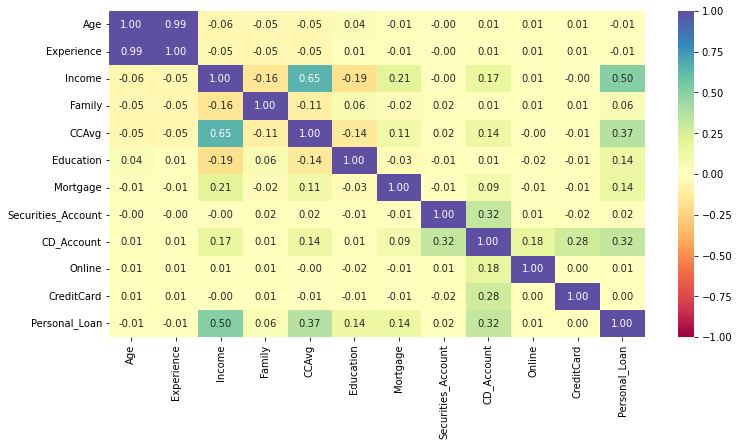

<IPython.core.display.Javascript object>

In [76]:
df.drop("ID", inplace=True, axis=1)
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

* Age and Experience have a perfect correlation hence one of these variables can be dropped while model building as they will provide the same information to the model.

* Income and CCAvg have a moderate correlation which makes sense as the Income increases the spendings might also increase.

* Family has a negative correlation with Income, which is quite surprising as family size increases the income of the family decreases. But this correlation is not too strong to conclude.

In [119]:
# PDF and boxplot for bivariate analysis
def plot_pdf_boxplot(data, feature, change_x=False):
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))
    ax[0].title.set_text(f"PDF of {feature}")
    sns.kdeplot(data[feature], hue=data["Personal_Loan"], palette="Dark2", ax=ax[0])
    ax[1].title.set_text(f"Boxplot of {feature}")
    if not change_x:
        sns.boxplot(x=data["Personal_Loan"], y=data[feature], palette="Dark2", ax=ax[1])
    else:
        sns.boxplot(
            y=data["Personal_Loan"], x=data[feature], palette="winter", ax=ax[1]
        )
    plt.show()

<IPython.core.display.Javascript object>

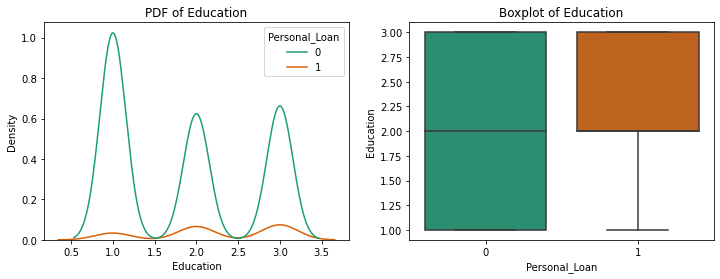

<IPython.core.display.Javascript object>

In [117]:
plot_pdf_boxplot(df, "Education")

* only ~15% of the customers who have done advanced/professional studies require a personal loan.
* Undergraduates have the least requirement of personal loans.

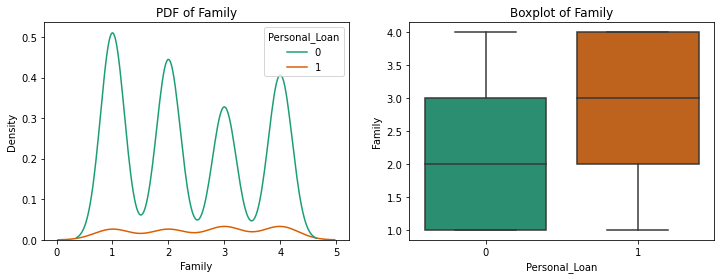

<IPython.core.display.Javascript object>

In [122]:
plot_pdf_boxplot(df, "Family")

* As the family size increases the requirement of a Personal Loan also increases.
* Customers who have a family size of more than 2 are more likely to take a Personal Loan.

In [130]:
# function for a stacked barplot

# data: dataframe
# predictor: independent variable
# target: target variable
    
def stacked_barplot(data, predictor, target="Personal_Loan"):

    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

Personal_Loan     0    1   All
CD_Account                    
All            4520  480  5000
0              4358  340  4698
1               162  140   302
------------------------------------------------------------------------------------------------------------------------


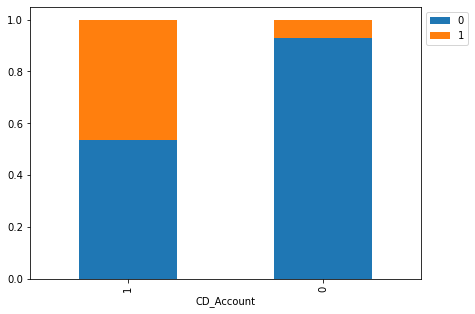

<IPython.core.display.Javascript object>

In [131]:
stacked_barplot(df, "CD_Account")

* ~50% of the customers who have a certificate of deposit with the bank (CD_Account) are the ones that have the requirement of a Personal Loan.
* This can be one of the significant predictors of Personal Loan as it provides good separation between two classes.

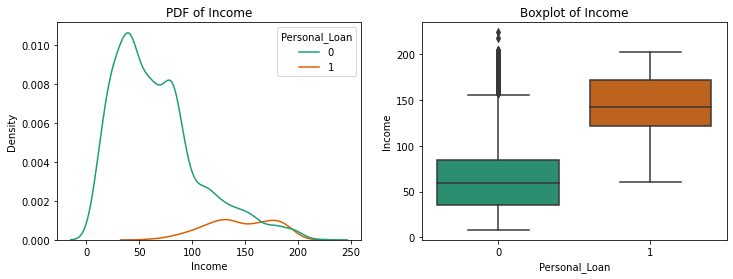

<IPython.core.display.Javascript object>

In [132]:
plot_pdf_boxplot(df, "Income")

* Those customers who have an income higher than 120k dollars are the potential customers who will take the Personal Loan.
* Income seems to be a significant predictor as it provides a good separation between two classes.

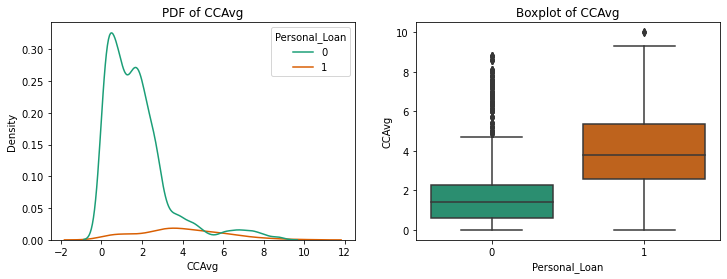

<IPython.core.display.Javascript object>

In [133]:
plot_pdf_boxplot(df, "CCAvg")

* The customers with a CCAvg of greater than 3 (within 3 to 6) can be the potential customers who opt for Personal Loan.

# Summary of EDA
**Data Description:**
* The dataset has 5000 rows and 14 columns 
* There are no missing values in the dataset.
* Dependent variable is Personal_Loan.

**Data Cleaning:**

* `Experience:` We observed that there are negative values in the Experience column. We assume that these negative signs here are data input errors, so we will replace them with positive values.
* `ZIPCode`: 
    * There are 467 unique values in the zip code.
    * In the US, The first digit of a PIN indicates the zone or a region, the second indicates the sub-zone, and the third, combined with the first two, indicates the sorting district within that zone. The final three digits are assigned to individual post offices within the sorting district
    * We grouped them based on the first 2 digits to reduce the number of unique values in the ZIPCode column. 
* `ID`: The ID attribute does not add any information to our analysis as all the values are unique. There is no association between a person's customer ID and loan, also it does not provide any general conclusion for future potential loan customers. We will drop this feature.


**Observations from EDA:**

* `Age`: Average age of customers is 45 years, age of customers has a wide range from 23 to 67 years. The distribution of Age is fairly symmetrical about the mean and the median. 


* `Experience`: 
    * The Experience variable seems to be fairly symmetrical about mean and median. The distribution of Experience looks like the distribution of Age. The mean and median experience of customers is equal to ~20 years.
    * Some customers have experience of more than 40 years.


* `Income`: 
    * Average income of customers is 73k dollars. Income has a wide range from 8k dollars to 224k dollars.
    * The distribution of Income is skewed to right.
    * 50% of the customers have income less than 64k dollars.


* `CCAvg`: 
    * Some customers have average spending of 0 dollars a month.
    * The distribution of CCAvg is skewed to the right and there are many outliers.
    * 50% of the customers have CCAvg less than 1.5.


* `Mortgage`: 
    * Average mortgage value of house of customers is ~56k dollars
    * Most customers have not mortgaged their house but there are many outliers.
    * Some customers have a mortgage house value of more than 600k dollars. Such customers can be potential customers who require a personal loan.


* `Family`: 
    * Most of the customers are single/live alone (~30%).
    * Second most are the ones with one dependent on them (25.9%).

* `ZIPCode`: 
    * All the customers are from region 9 and most from sub-region 4 followed by sub-region 2.
    * This indicates that bank is located in region 9 and has customers from nearby areas.


* `Education`: Most of the customers are undergraduate (41.9%), followed by customers who have advanced/professional education (30%).

* `Securities_Account`:* 89% of the customers do not have a securities account.
* `CD_Account`: 94% of the customers do not have a certificate of deposit (CD_Account) with the bank.


* `Observations on correlation:`
    * Age and Experience have an almost perfect correlation hence one of these variables can be dropped while model building as they will provide the same information to the model.
    * Income and CCAvg have a moderate correlation which makes sense as the Income increases the spendings might also increase.


* `Personal_Loan vs Education:`
    * ~15% of the customers who have done advanced/professional studies are the ones that require a personal loan.
    * Undergraduates have the least requirement of personal loans.


* `Personal_Loan vs Family:`
    * As the family size increases the requirement of a Personal Loan also increases.
    * Customers who have a family size of more than 2 are more likely to take a Personal Loan.


* `Personal_Loan vs CD_Account:`
    * ~50% of the customers who have a certificate of deposit with the bank (CD_Account) are the ones that have the requirement of a Personal Loan.
    * This can be one of the significant predictors of Personal Loan as it provides good separation between two classes.


* `Personal_Loan vs Income:`
    * Those customers who have an income higher than 90k-100k dollars are the potential customers who will take the Personal Loan.
    * Income seems to be a significant predictor as it provides a good separation between two classes.


* `Personal_Loan vs CCAvg:` The customers with a CCAvg of greater than 5 can be the potential customers who opt for Personal Loan.

# Data Preprocessing

In [134]:
df.isnull().sum()

Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
Personal_Loan         0
dtype: int64

<IPython.core.display.Javascript object>

- There are no null values

In [136]:
df.duplicated().sum()

1

<IPython.core.display.Javascript object>

- there is 1 duplicated row, hence we will remove it

In [137]:
df.drop_duplicates(subset=None, keep="first", inplace=True)

<IPython.core.display.Javascript object>

In [138]:
df.duplicated().sum()

0

<IPython.core.display.Javascript object>

In [187]:
# categorizing education
df["Education"].replace(1, "Undergraduate", inplace=True)
df["Education"].replace(2, "Graduate", inplace=True)
df["Education"].replace(3, "Professional", inplace=True)

<IPython.core.display.Javascript object>

# Model Building

In [189]:
# dropping Experience since Age and Experience are strongly correlated
X = df.drop(["Experience", "Personal_Loan"], axis=1)
y = df["Personal_Loan"]

# creating dummies of Education class
X = pd.get_dummies(X, columns=["Education"], drop_first=True)

<IPython.core.display.Javascript object>

In [190]:
# train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=1, stratify=y
)

<IPython.core.display.Javascript object>

In [191]:
# checking the shape and distribution of label
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True).to_string())
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True).to_string())

Shape of Training set :  (3499, 12)
Shape of test set :  (1500, 12)
Percentage of classes in training set:
0   0.90397
1   0.09603
Percentage of classes in test set:
0   0.90400
1   0.09600


<IPython.core.display.Javascript object>

- the test and training set have same distrbution of label class due to stratify parameter

## 1. Model Evaluation Criterion

#### Model can make wrong predictions as:

1. Predicting a customer will take the personal loan but in reality the customer will not take the personal loan - Loss of resources
2. Predicting a customer will not take the personal loan but in reality the customer was going to take the personal loan - Loss of opportunity

#### Which case is more important? 
* First case : Losing a potential customer by predicting that the customer will not be taking the personal loan but in reality the customer was going to take the personal loan.
* This is False Negative prediction - predicted negative but was positive

#### How to reduce this loss i.e need to reduce False Negatives?
* To minimise False Negatives, we need to maximise the `Recall`
* Greater the Recall higher the chances of minimizing False Negatives
* Hence the model should maximise the Recall, also called `Sensitivity`

## 2. Functions for evaluation metrics and confusion matrix

In [216]:
# defining a function to compute different metrics to check performance of a classification model built using
# sklearn

# model: classifier
# predictors: independent variables
# target: dependent variable
# threshold: threshold for classifying the observation as class 1


def model_performance_classification_with_threshold(
    model, predictors, target, threshold=0.5
):

    # predicting using the independent variables
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    pred = np.round(pred_thres)  # will round every prob > thresh to 1

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=["Value"],
    )

    return df_perf.T

<IPython.core.display.Javascript object>

In [229]:
# defining a function to plot the confusion_matrix of a classification model built using sklearn

# model: classifier
# predictors: independent variables
# target: dependent variable
# threshold: threshold for classifying the observation as class 1
# pred_prob = model.predict_proba(predictors)[:, 1]
# pred_thres = pred_prob > threshold
# y_pred = np.round(pred_thres)


def confusion_matrix_sklearn_with_threshold(model, predictors, target, threshold=0.5):

    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    y_pred = np.round(pred_thres)

    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

## 3. Training Model

### 3.1 Logistic Regression

In [194]:
lr = LogisticRegression(solver="newton-cg", n_jobs=-1, random_state=1)
lr.fit(X_train, y_train)

LogisticRegression(n_jobs=-1, random_state=1, solver='newton-cg')

<IPython.core.display.Javascript object>

#### Checking coefficients of each feature and getting insights

In [195]:
log_odds = lr.coef_[0]

pd.options.display.float_format = "{:.5f}".format
pd.DataFrame(log_odds, X_train.columns, columns=["coef"])

,coef
Age,0.01247
Income,0.06138
ZIPCode,0.00526
Family,0.65464
CCAvg,0.11632
Mortgage,0.00108
Securities_Account,-0.52605
CD_Account,2.82233
Online,-0.60080
CreditCard,-0.66001


<IPython.core.display.Javascript object>

* Coefficients of Age, Income, Family, CCAvg, CD_Account, Education, and ZIPCode are positive. An increase in these will lead to an increase in chances of taking a personal loan.

* Coefficients of Securities_Account, CreditCard, Online are negative. An increase in these will lead to a decrease in chances of taking a personal loan.

#### Changing the log odds to odds ratio and getting the percent change in odds

In [201]:
# converting coefficients to odds
odds = np.exp(lr.coef_[0])

# finding the percentage change
perc_change_odds = (np.exp(lr.coef_[0]) - 1) * 100

# adding the odds to a dataframe
pd.DataFrame(
    {"Odds": odds, "Change in odds(%)": perc_change_odds}, index=X_train.columns
)

,Odds,Change in odds(%)
Age,1.01255,1.25497
Income,1.06331,6.33050
ZIPCode,1.00528,0.52767
Family,1.92444,92.44418
CCAvg,1.12335,12.33541
Mortgage,1.00108,0.10782
Securities_Account,0.59093,-40.90669
CD_Account,16.81598,1581.59787
Online,0.54837,-45.16279
CreditCard,0.51685,-48.31518


<IPython.core.display.Javascript object>

#### Coefficient interpretations

* `Age`: 1 unit increase in Age will increase the odds of a customer taking the personal loan by 1.01 times or a 1.25% increase in the odds.
* `Income`: 1 unit increase in Income will increase the odds of taking a personal loan by 1.06 times or a 6.33% increase in the odds.
* `Family`: 1 unit increase in Family will increase the odds of taking a personal loan by 1.92 times or a 92.44% increase in the odds.
* `CCAvg`: 1 unit increase in CCAvg will increase the odds of a customer taking a personal loan by 1.23 times or a 12.03% increase in the odds.
* `Securities_Account`: The odds of a customer who has a Securities_Account with bank taking a personal loan is 0.59 times or 40.9% less than the customer who doesn't have a Securities_Account.
* `Online`: The odds of a customer who prefers internet banking facilities taking a personal loan is 0.54 times or 45.16% less than the customer who doesn't use internet banking facilities.
* Education_Professional and CD_Account have greater coefficients, so small increases in their value will have a bigger increase in chances of taking a personal loan.

#### Model performance on Training set

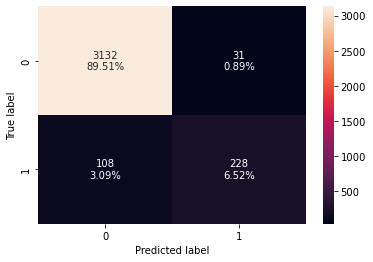

<IPython.core.display.Javascript object>

In [230]:
confusion_matrix_sklearn_with_threshold(lr, X_train, y_train)

In [218]:
# Training performance
log_reg_model_train_perf = model_performance_classification_with_threshold(
    lr, X_train, y_train
)
log_reg_model_train_perf

,Value
Accuracy,0.96027
Recall,0.67857
Precision,0.88031
F1,0.76639


<IPython.core.display.Javascript object>

#### ROC-AUC on training set

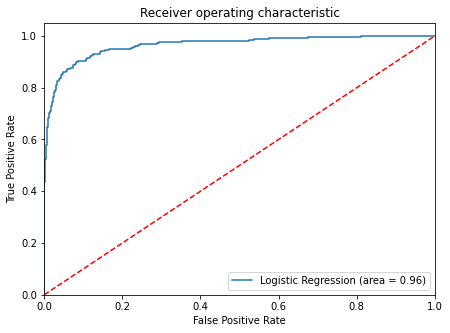

<IPython.core.display.Javascript object>

In [220]:
logit_roc_auc_train = roc_auc_score(y_train, lr.predict_proba(X_train)[:, 1])
fpr, tpr, thresholds = roc_curve(y_train, lr.predict_proba(X_train)[:, 1])
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

* Logistic Regression model is giving a good performance on training set.
* ROC-AUC score of 0.96 on training is quite good.
* Let's see if the recall score can be improved further, by changing the model threshold using AUC-ROC Curve.

#### Optimal threshold using AUC-ROC curve

In [232]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where TPR is high and FPR is low
fpr, tpr, thresholds = roc_curve(y_train, lr.predict_proba(X_train)[:, 1])

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]

print(optimal_threshold_auc_roc)

0.12495191098300618


<IPython.core.display.Javascript object>

#### Checking model performance on the training set using 0.12 theshold

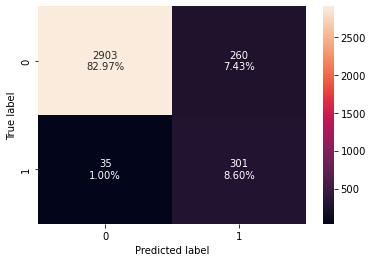

<IPython.core.display.Javascript object>

In [233]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lr, X_train, y_train, threshold=optimal_threshold_auc_roc
)

In [234]:
# Training performance
log_reg_model_train_perf = model_performance_classification_with_threshold(
    lr, X_train, y_train, threshold=optimal_threshold_auc_roc
)
log_reg_model_train_perf

,Value
Accuracy,0.91569
Recall,0.89583
Precision,0.53654
F1,0.67113


<IPython.core.display.Javascript object>

* `Recall` has increased significantly as compared to the previous model.
* As we will `decrease` the `threshold` value, `Recall` will keep on `increasing` and the `Precision` will `decrease`
* This not right because it will lead to loss of resources, we need to choose an optimal balance between recall and precision.
* This can be obtained from a Precision-recall curve

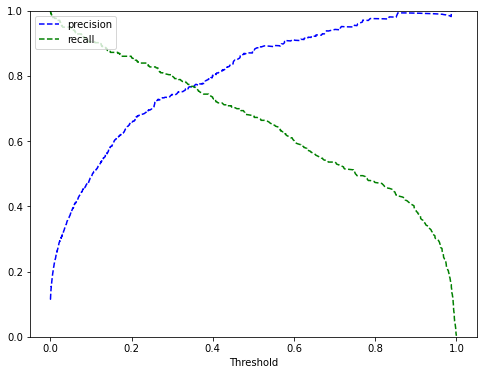

<IPython.core.display.Javascript object>

In [239]:
# plotting Recall-Precision VS threshold

y_scores = lr.predict_proba(X_train)[:, 1]
prec, rec, tre = precision_recall_curve(y_train, y_scores)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(8, 6))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

- As we can see from the curve, at a threshold of `0.27`, we get a good balance between precision and recall

In [241]:
# setting the threshold to 0.27
optimal_threshold_curve = 0.27

<IPython.core.display.Javascript object>

#### Checking model performance on training set

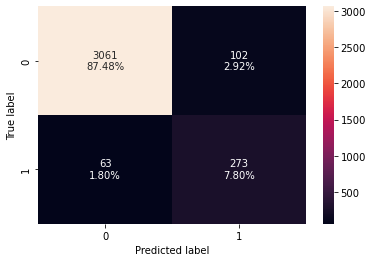

<IPython.core.display.Javascript object>

In [242]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lr, X_train, y_train, threshold=optimal_threshold_curve
)

In [244]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_with_threshold(
    lr, X_train, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


,Value
Accuracy,0.95284
Recall,0.81250
Precision,0.72800
F1,0.76793


<IPython.core.display.Javascript object>

* Model is performing well on training set.
* Model has given a balanced performance on recall and precision
* If the bank wishes to maintain a balance between recall and precision, this model can be used.

### 3.2 Logistic Regression using Sequential Feature Selector